#IMPORTAR

In [40]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import pandas as pd

datos = pd.read_csv("/content/drive/MyDrive/Semestre3/TFM/Lung.csv")

In [42]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Columns: 54677 entries, samples to AFFX-TrpnX-M_at
dtypes: float64(54675), int64(1), object(1)
memory usage: 47.6+ MB


#Visualización

In [43]:
print(str(len(datos)))
datos.head()

114


,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,556,tumoral,12.014762,6.983442,6.540233,8.362803,3.780203,9.188556,5.674197,6.262662,...,13.391406,12.688067,14.222519,14.145409,10.784380,9.229371,10.030957,3.569567,4.249465,3.982578
1,557,tumoral,11.317501,7.243950,6.927529,8.374879,3.845977,8.546901,5.680735,5.811109,...,13.307399,12.579227,14.192594,14.145906,9.772229,7.742450,8.501174,3.532915,4.134520,3.917711
2,558,tumoral,10.868398,7.213200,7.110826,8.258420,4.074300,9.295490,5.494098,5.788352,...,13.747090,13.054736,14.391262,14.313572,11.928554,10.481570,11.281070,3.453530,4.226954,3.706964
3,559,tumoral,11.968264,8.003929,7.167021,8.794291,3.679181,8.404464,5.877476,5.746267,...,12.679800,11.850551,13.872564,13.703017,4.679738,4.777636,4.329992,3.568955,4.091501,3.881763
4,560,tumoral,11.770490,8.372459,7.797680,8.891273,3.925639,8.453391,5.767672,5.705104,...,12.879360,12.116750,14.203035,14.030176,12.906862,8.174265,11.247059,3.628792,3.968562,4.000934


In [44]:
dataAM = datos[['type']]
dataAM.head()

,type
0,tumoral
1,tumoral
2,tumoral
3,tumoral
4,tumoral


#PREPROCESO

**Deshacemos de la columna samples**

In [46]:
cols=["samples"]
datos=datos.drop(cols, axis=1)

**Codificar columna type**

In [47]:
from sklearn.preprocessing import LabelEncoder

l1=LabelEncoder()
l1.fit(datos["type"])
datos.type=l1.transform(datos.type)

print(datos.type)

0      1
1      1
2      1
3      1
4      1
      ..
109    0
110    0
111    0
112    0
113    0
Name: type, Length: 114, dtype: int64


**Dividir dataset**

In [48]:
from sklearn.model_selection import train_test_split

micro = datos.values[:,1:]
tipo = datos.values[:,0]

train_micro, test_micro, train_tipo, test_tipo = train_test_split(micro, tipo, test_size = 0.33, random_state = 12345)

print("Micro test:",test_micro.shape[0])
print("Micro train:",train_micro.shape[0])

print("Tipo test:",test_tipo.shape[0])
print("Tipo train:",train_tipo.shape[0])

Micro test: 38
Micro train: 76
Tipo test: 38
Tipo train: 76


**Normalizar los datos:**

In [49]:
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()
#Primero normalizamos los datos training:
train_micro = norm.fit_transform(train_micro)
#Despues los test usando los mismos parámetros que del training:
test_micro = norm.transform(test_micro)

#Creación de modelos

In [50]:
#Los necesitaremos para ver la eficencia de los modelos
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix

##Nearest Neighbor

In [13]:
from sklearn.neighbors import KNeighborsClassifier

#Creamos el modelo:
knn = KNeighborsClassifier()
#Entrenamos el modelo:
knn.fit(train_micro, train_tipo)
#Realizamos una predicción con el modelo:
pred = knn.predict(test_micro)
#Vemos los resultados:
print(knn.score(test_micro, test_tipo))
print(confusion_matrix(test_tipo, pred))
print(classification_report(test_tipo, pred))


0.7631578947368421
[[17  1]
 [ 8 12]]
              precision    recall  f1-score   support

         0.0       0.68      0.94      0.79        18
         1.0       0.92      0.60      0.73        20

    accuracy                           0.76        38
   macro avg       0.80      0.77      0.76        38
weighted avg       0.81      0.76      0.76        38



**tuning**

In [14]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Creamos un diccionario para definir los distintos hiperparmaetros que queremos cambiar:
parameters = {
    'leaf_size' : list(range(1,50)), 
    'n_neighbors' : [3, 5, 7, 11],
    'p' : [1,2],
}
#Creamos el modelo:
knnt = GridSearchCV(knn, param_grid = parameters, scoring = "accuracy", cv = 3)
#Entrenamos el modelo:
knnt.fit(train_micro, train_tipo)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [3, 5, 7, 11], 'p': [1, 2]},
             scoring='accuracy')

In [15]:
knnt.best_params_

{'leaf_size': 1, 'n_neighbors': 11, 'p': 1}

In [16]:
#Realizamos una predicción con el modelo:
pred = knnt.predict(test_micro)
#Vemos los resultados:
print(knnt.score(test_micro, test_tipo))
print(confusion_matrix(test_tipo, pred))
print(classification_report(test_tipo, pred))

0.7105263157894737
[[17  1]
 [10 10]]
              precision    recall  f1-score   support

         0.0       0.63      0.94      0.76        18
         1.0       0.91      0.50      0.65        20

    accuracy                           0.71        38
   macro avg       0.77      0.72      0.70        38
weighted avg       0.78      0.71      0.70        38



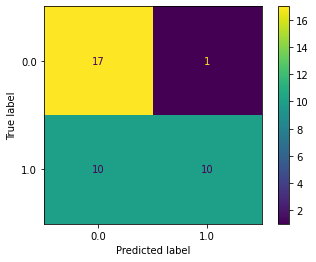

In [17]:
plot_confusion_matrix(knnt, test_micro, test_tipo)

##Decision Trees

In [18]:
from sklearn.tree import DecisionTreeClassifier

#Creamos el modelo:
dt = DecisionTreeClassifier()
#Entrenamos el modelo:
dt.fit(train_micro, train_tipo)
#Realizamos una predicción con el modelo:
pred = dt.predict(test_micro)
#Vemos los resultados:
print(dt.score(test_micro, test_tipo))
print(confusion_matrix(test_tipo, pred))
print(classification_report(test_tipo, pred))

0.8947368421052632
[[17  1]
 [ 3 17]]
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89        18
         1.0       0.94      0.85      0.89        20

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.89        38
weighted avg       0.90      0.89      0.89        38



**tuning**

In [19]:
#Creamos un diccionario para definir los distintos hiperparmaetros que queremos cambiar:
parameters = {
    'max_depth' : [2, 3, 5, 10, 20], 
    'min_samples_leaf' : [5, 10, 20, 50, 100],
    'criterion' : ["gini", "entropy"],
}
#Creamos el modelo:
dtt = GridSearchCV(dt, param_grid = parameters, scoring = "accuracy", cv = 3)
#Entrenamos el modelo:
dtt.fit(train_micro, train_tipo)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [20]:
dtt.best_params_

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 20}

In [21]:
#Realizamos una predicción con el modelo:
pred = dtt.predict(test_micro)
#Vemos los resultados:
print(dtt.score(test_micro, test_tipo))
print(confusion_matrix(test_tipo, pred))
print(classification_report(test_tipo, pred))

0.8947368421052632
[[17  1]
 [ 3 17]]
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89        18
         1.0       0.94      0.85      0.89        20

    accuracy                           0.89        38
   macro avg       0.90      0.90      0.89        38
weighted avg       0.90      0.89      0.89        38



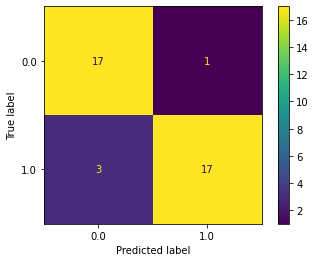

In [22]:
plot_confusion_matrix(dtt, test_micro, test_tipo)

##Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

#Creamos el modelo:
lr = LogisticRegression()
#Entrenamos el modelo:
lr.fit(train_micro, train_tipo)
#Realizamos una predicción con el modelo:
pred = lr.predict(test_micro)
#Vemos los resultados:
print(lr.score(test_micro, test_tipo))
print(confusion_matrix(test_tipo, pred))
print(classification_report(test_tipo, pred))

0.9210526315789473
[[17  1]
 [ 2 18]]
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92        18
         1.0       0.95      0.90      0.92        20

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



**tuning**

In [24]:
#Creamos un diccionario para definir los distintos hiperparmaetros que queremos cambiar:
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
#Creamos el modelo:
lrt = GridSearchCV(lr, param_grid = parameters, scoring = "accuracy", cv = 3)
#Entrenamos el modelo:
lrt.fit(train_micro, train_tipo)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [25]:
lrt.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [26]:
#Realizamos una predicción con el modelo:
pred = lrt.predict(test_micro)
#Vemos los resultados:
print(lrt.score(test_micro, test_tipo))
print(confusion_matrix(test_tipo, pred))
print(classification_report(test_tipo, pred))

0.9210526315789473
[[17  1]
 [ 2 18]]
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92        18
         1.0       0.95      0.90      0.92        20

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



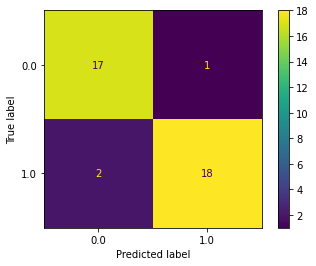

In [27]:
plot_confusion_matrix(lrt, test_micro, test_tipo)

##Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

#Creamos el modelo con la función linear de kernel:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 12345)
#Entrenamos el modelo:
rf.fit(train_micro, train_tipo)

RandomForestRegressor(n_estimators=1000, random_state=12345)

In [51]:
#Realizamos una predicción con el modelo:
pred = rf.predict(test_micro)
#Transformamos las predicciones a sus labels para ver los resultados
pred = pred.flatten()
tipo_pred = np.where(pred > 0.5,1,0)

In [52]:
#Vemos los resultados:
print(confusion_matrix(test_tipo, tipo_pred))
print(classification_report(test_tipo, tipo_pred))

[[17  1]
 [ 2 18]]
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92        18
         1.0       0.95      0.90      0.92        20

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



**tuning**

In [31]:
#Creamos un diccionario para definir los distintos hiperparmaetros que queremos cambiar:
parameters = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
#Creamos el modelo:
rft = GridSearchCV(rf, param_grid = parameters, scoring = "accuracy", cv = 3)
#Entrenamos el modelo:
rft.fit(train_micro, train_tipo)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=1000,
                                             random_state=12345),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='accuracy')

In [53]:
rft.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [55]:
#Realizamos una predicción con el modelo:
predt = rft.predict(test_micro)

predt = predt.flatten()
tipo_predt = np.where(pred > 0.5,1,0)

In [56]:
#Vemos los resultados:
print(confusion_matrix(test_tipo, tipo_predt))
print(classification_report(test_tipo, tipo_predt))

[[17  1]
 [ 2 18]]
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92        18
         1.0       0.95      0.90      0.92        20

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



##SVM

In [35]:
from sklearn.svm import SVC

#Creamos el modelo con la función linear de kernel:
svcl = SVC(kernel = "linear", random_state = 12345)
#Entrenamos el modelo:
svcl.fit(train_micro, train_tipo)
#Realizamos una predicción con el modelo:
pred = svcl.predict(test_micro)
#Vemos los resultados:
print("Precisión", svcl.score(test_micro, test_tipo))
print(confusion_matrix(test_tipo, pred))
print(classification_report(test_tipo, pred))

Precisión 0.9210526315789473
[[17  1]
 [ 2 18]]
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92        18
         1.0       0.95      0.90      0.92        20

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



In [36]:
#Creamos el modelo con la función polinomica de kernel:
svcp = SVC(kernel = "poly", degree = 9, random_state = 12345)
#Entrenamos el modelo:
svcp.fit(train_micro, train_tipo)
#Realizamos una predicción con el modelo:
pred = svcp.predict(test_micro)
#Vemos los resultados:
print(svcp.score(test_micro, test_tipo))
print(confusion_matrix(test_tipo, pred))
print(classification_report(test_tipo, pred))

0.47368421052631576
[[18  0]
 [20  0]]
              precision    recall  f1-score   support

         0.0       0.47      1.00      0.64        18
         1.0       0.00      0.00      0.00        20

    accuracy                           0.47        38
   macro avg       0.24      0.50      0.32        38
weighted avg       0.22      0.47      0.30        38



In [37]:
#Creamos el modelo con la función Gaussiana de kernel:
svcr = SVC(kernel = "rbf", random_state = 12345)
#Entrenamos el modelo:
svcr.fit(train_micro, train_tipo)
#Realizamos una predicción con el modelo:
pred = svcr.predict(test_micro)
#Vemos los resultados:
print(svcr.score(test_micro, test_tipo))
print(confusion_matrix(test_tipo, pred))
print(classification_report(test_tipo, pred))

0.9210526315789473
[[17  1]
 [ 2 18]]
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92        18
         1.0       0.95      0.90      0.92        20

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



In [38]:
#Creamos el modelo con la función sigmoide de kernel:
svcs = SVC(kernel = "sigmoid", random_state = 12345)
#Entrenamos el modelo:
svcs.fit(train_micro, train_tipo)
#Realizamos una predicción con el modelo:
pred = svcs.predict(test_micro)
#Vemos los resultados:
print(svcs.score(test_micro, test_tipo))
print(confusion_matrix(test_tipo, pred))
print(classification_report(test_tipo, pred))

0.9210526315789473
[[17  1]
 [ 2 18]]
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92        18
         1.0       0.95      0.90      0.92        20

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



**tuning**

In [64]:
#Creamos un diccionario para definir los distintos hiperparmaetros que queremos cambiar:
parameters = {
    'C':[0.1, 1, 10, 100],
    'gamma':[1, 0.1, 0.01, 0.001],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid']
}

#Creamos el modelo:
svct = GridSearchCV(SVC(), param_grid = parameters, scoring = "accuracy", cv = 3)
#Entrenamos el modelo:
svct.fit(train_micro, train_tipo)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [65]:
svct.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [66]:
#Realizamos una predicción con el modelo:
pred = svct.predict(test_micro)
#Vemos los resultados:
print(svct.score(test_micro, test_tipo))
print(confusion_matrix(test_tipo, pred))
print(classification_report(test_tipo, pred))

0.9210526315789473
[[17  1]
 [ 2 18]]
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92        18
         1.0       0.95      0.90      0.92        20

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



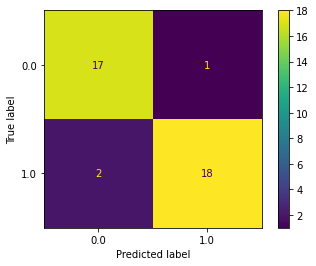

In [42]:
plot_confusion_matrix(svct, test_micro, test_tipo)

#Guardar

In [67]:
#Invertimos los labels
datos.type=l1.inverse_transform(datos.type)

print(datos.type)

0      tumoral
1      tumoral
2      tumoral
3      tumoral
4      tumoral
        ...   
109     normal
110     normal
111     normal
112     normal
113     normal
Name: type, Length: 114, dtype: object


In [68]:
tipo = datos.values[:,0]

In [69]:
#Entrenamos el modelo defintivo
svct = SVC(kernel = "linear", C = 0.1, gamma = 1, random_state=12345)
svct.fit(micro, tipo)

SVC(C=0.1, gamma=1, kernel='linear', random_state=12345)

In [71]:
import pickle

modelo = "modelo.sav"
pickle.dump(svct,open(modelo, "wb"))

Prueba de funcionalidad del modelo

In [72]:
df = pd.read_csv("/content/drive/MyDrive/Semestre3/TFM/sample.csv")
t = pd.read_csv("/content/drive/MyDrive/Semestre3/TFM/samplet.csv")
n = pd.read_csv("/content/drive/MyDrive/Semestre3/TFM/samplen.csv")

In [73]:
print(svct.predict(df))
print(svct.predict(t))
print(svct.predict(n))

['tumoral' 'tumoral' 'tumoral' 'normal' 'normal' 'normal']
['tumoral']
['normal']
